2023-06-15 11:07:11.150418: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


importing Jupyter notebook from textPreProcessor.ipynb
importing Jupyter notebook from imagePreProcessor.ipynb
importing Jupyter notebook from TesseractModify.ipynb
['payin' 'rmnwoce' ' ' 'Invoice' 'number:' 'PM22B3467677' 'Monday,24th'
 'October' '10:00' 'PM:' 'Customer' 'Details:' '9008511911' 'Booking'
 '1D:280661/19448192990' 'Booking' 'Date:' 'Monday,October' '24,2022'
 'Order' 'ID:' '19448192990' 'Kantara' 'Kannada' ',U/A' 'Balajt' '4K'
 'Atmos' '3D' 'Cinema,' 'Chikkalasandea' 'Uttarahallt' 'Main' 'Rd'
 'Balaji' 'Cinemas,' '64/1,' 'Krishna' 'Towers,' 'Uttarahalll' 'Main'
 'Road,' 'Chikkalsandra,' 'Bengaluru,' 'Kamataka' '$60061,' 'India' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' 'Screen' '1' 'Gold-J19' '-' '23' 'Order'
 'Summary' 'Total' 'Amount' '129.80' 'Charges' 'Booking' 'Charge'
 '%110.00' '(HSN/' 'SAC' 'Code:' '998599)' '-Sub' 'Total' '(A)' '%'
 '110.00' '“Taxes' 'Central' 'Goods' 'and' 'Sérvice' 'Tax' '@' '9%.'
 '29.90' 'State' 'Goods' 'and' 'Service' 'Tax' '@9%' '29.90' 'Sub' 'Total'


<string>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


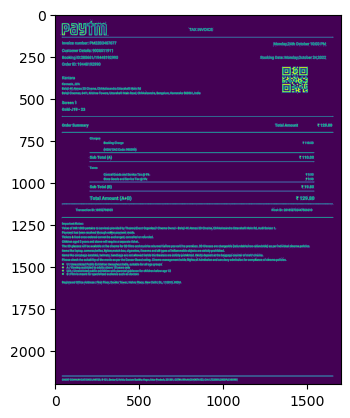

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd="/home/aman/anaconda3/envs/tallyInvoiceParser.env/bin/tesseract"
os.environ['TESSDATA_PREFIX'] = "/home/aman/anaconda3/envs/tallyInvoiceParser.env/share/tessdata"
import import_ipynb
from textPreProcessor import *
from imagePreProcessor import *
from TesseractModify import *
from datetime import datetime
import math

In [2]:
pwd

'/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Tesseract-Modelv4/Dataset/SampleImages'

In [3]:
imagesDir = '/home/aman/Documents/Tally/DocumentAI/Code/Tesseract-Modelv4/Dataset/SampleImages/'

In [4]:
os.chdir(imagesDir)

In [5]:
imagePath="6.jpeg"

In [6]:
image = cv2.imread(imagePath)

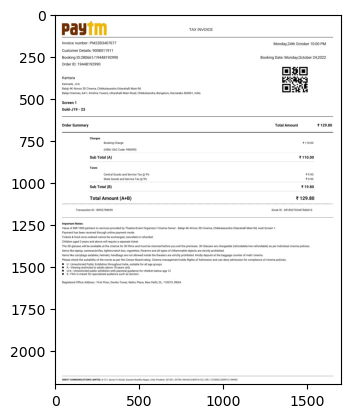

In [7]:
plt.imshow(image)

In [8]:
preProcessedImage = preProcessImage(imagePath)

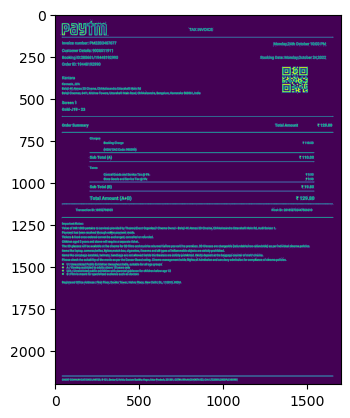

In [9]:
plt.imshow(preProcessedImage)

In [10]:
data = pytesseract.image_to_data(preProcessedImage, output_type=Output.DATAFRAME)
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(columns=["index"], inplace=True)
#processData(data)

In [11]:
df = pd.DataFrame(data)

In [12]:
df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,32,35,285,93,43.760906,payin
1,5,1,1,1,1,2,792,81,152,20,0.000000,rmnwoce
2,5,1,2,1,1,1,45,133,1605,10,95.000000,
3,5,1,3,1,1,1,43,163,68,18,96.488281,Invoice
4,5,1,3,1,1,2,119,163,80,18,93.032722,number:
...,...,...,...,...,...,...,...,...,...,...,...,...
337,5,1,16,1,1,12,658,2168,50,14,90.287514,"207301,"
338,5,1,16,1,1,13,711,2168,43,12,92.993866,GSTIN:
339,5,1,16,1,1,14,757,2168,129,14,38.400703,"O9AAACO4007A1Z3,"
340,5,1,16,1,1,15,889,2168,26,12,92.983109,CIN:


In [13]:
df.dropna(inplace=True)

In [14]:
df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,32,35,285,93,43.760906,payin
1,5,1,1,1,1,2,792,81,152,20,0.000000,rmnwoce
2,5,1,2,1,1,1,45,133,1605,10,95.000000,
3,5,1,3,1,1,1,43,163,68,18,96.488281,Invoice
4,5,1,3,1,1,2,119,163,80,18,93.032722,number:
...,...,...,...,...,...,...,...,...,...,...,...,...
337,5,1,16,1,1,12,658,2168,50,14,90.287514,"207301,"
338,5,1,16,1,1,13,711,2168,43,12,92.993866,GSTIN:
339,5,1,16,1,1,14,757,2168,129,14,38.400703,"O9AAACO4007A1Z3,"
340,5,1,16,1,1,15,889,2168,26,12,92.983109,CIN:


In [15]:
print(df["text"].to_numpy())

['payin' 'rmnwoce' ' ' 'Invoice' 'number:' 'PM22B3467677' 'Monday,24th'
 'October' '10:00' 'PM:' 'Customer' 'Details:' '9008511911' 'Booking'
 '1D:280661/19448192990' 'Booking' 'Date:' 'Monday,October' '24,2022'
 'Order' 'ID:' '19448192990' 'Kantara' 'Kannada' ',U/A' 'Balajt' '4K'
 'Atmos' '3D' 'Cinema,' 'Chikkalasandea' 'Uttarahallt' 'Main' 'Rd'
 'Balaji' 'Cinemas,' '64/1,' 'Krishna' 'Towers,' 'Uttarahalll' 'Main'
 'Road,' 'Chikkalsandra,' 'Bengaluru,' 'Kamataka' '$60061,' 'India' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' 'Screen' '1' 'Gold-J19' '-' '23' 'Order'
 'Summary' 'Total' 'Amount' '129.80' 'Charges' 'Booking' 'Charge'
 '%110.00' '(HSN/' 'SAC' 'Code:' '998599)' '-Sub' 'Total' '(A)' '%'
 '110.00' '“Taxes' 'Central' 'Goods' 'and' 'Sérvice' 'Tax' '@' '9%.'
 '29.90' 'State' 'Goods' 'and' 'Service' 'Tax' '@9%' '29.90' 'Sub' 'Total'
 '(B)' '2.19.80' 'Total' 'Amount' '(A+B)' '=' '129.80' '‘Transaction'
 'ID:' '18952798939' 'Klosk' 'ID:' '281852732447566610' 'Important'
 'Notes:' 'Value' 'of' 'INR

In [16]:
toDrop = []
for col in df.columns:
    if len(df[col].unique())==1:
        toDrop.append(col)
df.drop(columns=toDrop, inplace=True)

indexesToDrop = []
stopwords=[""]
#stopwords = ["", " ", "  ", "/", ":", "-", ".", ",", "\n", "\t", "\\", "(", ")", "[", "]", "{", "}", "*", "&", "%", "$", "#", "|"]
for index in df.index:
    if df["text"][index] in stopwords:
        indexesToDrop.append(index)   
df.drop(indexesToDrop, inplace=True)

df

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,1,1,32,35,285,93,43.760906,payin
1,1,1,1,2,792,81,152,20,0.000000,rmnwoce
2,2,1,1,1,45,133,1605,10,95.000000,
3,3,1,1,1,43,163,68,18,96.488281,Invoice
4,3,1,1,2,119,163,80,18,93.032722,number:
...,...,...,...,...,...,...,...,...,...,...
337,16,1,1,12,658,2168,50,14,90.287514,"207301,"
338,16,1,1,13,711,2168,43,12,92.993866,GSTIN:
339,16,1,1,14,757,2168,129,14,38.400703,"O9AAACO4007A1Z3,"
340,16,1,1,15,889,2168,26,12,92.983109,CIN:


In [17]:
print(df["text"].to_numpy())

['payin' 'rmnwoce' ' ' 'Invoice' 'number:' 'PM22B3467677' 'Monday,24th'
 'October' '10:00' 'PM:' 'Customer' 'Details:' '9008511911' 'Booking'
 '1D:280661/19448192990' 'Booking' 'Date:' 'Monday,October' '24,2022'
 'Order' 'ID:' '19448192990' 'Kantara' 'Kannada' ',U/A' 'Balajt' '4K'
 'Atmos' '3D' 'Cinema,' 'Chikkalasandea' 'Uttarahallt' 'Main' 'Rd'
 'Balaji' 'Cinemas,' '64/1,' 'Krishna' 'Towers,' 'Uttarahalll' 'Main'
 'Road,' 'Chikkalsandra,' 'Bengaluru,' 'Kamataka' '$60061,' 'India' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' 'Screen' '1' 'Gold-J19' '-' '23' 'Order'
 'Summary' 'Total' 'Amount' '129.80' 'Charges' 'Booking' 'Charge'
 '%110.00' '(HSN/' 'SAC' 'Code:' '998599)' '-Sub' 'Total' '(A)' '%'
 '110.00' '“Taxes' 'Central' 'Goods' 'and' 'Sérvice' 'Tax' '@' '9%.'
 '29.90' 'State' 'Goods' 'and' 'Service' 'Tax' '@9%' '29.90' 'Sub' 'Total'
 '(B)' '2.19.80' 'Total' 'Amount' '(A+B)' '=' '129.80' '‘Transaction'
 'ID:' '18952798939' 'Klosk' 'ID:' '281852732447566610' 'Important'
 'Notes:' 'Value' 'of' 'INR

In [18]:
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)

In [19]:
df

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,1,1,32,35,285,93,43.760906,payin
1,1,1,1,2,792,81,152,20,0.000000,rmnwoce
2,2,1,1,1,45,133,1605,10,95.000000,
3,3,1,1,1,43,163,68,18,96.488281,Invoice
4,3,1,1,2,119,163,80,18,93.032722,number:
...,...,...,...,...,...,...,...,...,...,...
337,16,1,1,12,658,2168,50,14,90.287514,"207301,"
338,16,1,1,13,711,2168,43,12,92.993866,GSTIN:
339,16,1,1,14,757,2168,129,14,38.400703,"O9AAACO4007A1Z3,"
340,16,1,1,15,889,2168,26,12,92.983109,CIN:


In [20]:
df["x"] = df["left"] + df["width"] 
df["y"] = df["top"] + df["height"]

In [21]:
df["PageHeight"] = preProcessedImage.shape[0]
df["PageWidth"] = preProcessedImage.shape[1]

In [22]:
df

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,x,y,PageHeight,PageWidth
0,1,1,1,1,32,35,285,93,43.760906,payin,317,128,2200,1700
1,1,1,1,2,792,81,152,20,0.000000,rmnwoce,944,101,2200,1700
2,2,1,1,1,45,133,1605,10,95.000000,,1650,143,2200,1700
3,3,1,1,1,43,163,68,18,96.488281,Invoice,111,181,2200,1700
4,3,1,1,2,119,163,80,18,93.032722,number:,199,181,2200,1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,16,1,1,12,658,2168,50,14,90.287514,"207301,",708,2182,2200,1700
338,16,1,1,13,711,2168,43,12,92.993866,GSTIN:,754,2180,2200,1700
339,16,1,1,14,757,2168,129,14,38.400703,"O9AAACO4007A1Z3,",886,2182,2200,1700
340,16,1,1,15,889,2168,26,12,92.983109,CIN:,915,2180,2200,1700


In [23]:
dateDF = df.copy()

In [24]:
dateDF

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,x,y,PageHeight,PageWidth
0,1,1,1,1,32,35,285,93,43.760906,payin,317,128,2200,1700
1,1,1,1,2,792,81,152,20,0.000000,rmnwoce,944,101,2200,1700
2,2,1,1,1,45,133,1605,10,95.000000,,1650,143,2200,1700
3,3,1,1,1,43,163,68,18,96.488281,Invoice,111,181,2200,1700
4,3,1,1,2,119,163,80,18,93.032722,number:,199,181,2200,1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,16,1,1,12,658,2168,50,14,90.287514,"207301,",708,2182,2200,1700
338,16,1,1,13,711,2168,43,12,92.993866,GSTIN:,754,2180,2200,1700
339,16,1,1,14,757,2168,129,14,38.400703,"O9AAACO4007A1Z3,",886,2182,2200,1700
340,16,1,1,15,889,2168,26,12,92.983109,CIN:,915,2180,2200,1700


In [25]:
def verifyDate(text):
    
    dates = list(datefinder.find_dates(text))
    valid = []
    for date in dates:
        M = date.today().month
        D = date.today().day
        if date.year>2023 or date.month>12 or date.day>31:
            pass
        else:
            valid.append(date)
    if len(valid)==0:
        return False
    else:
        return True
    
    
    

In [26]:
nlpModel = spacy.load("en_core_web_sm")

In [27]:
dates = []
for index in dateDF.index:
    text = dateDF["text"][index]
    doc = nlpModel(text)
    displacy.render(doc, jupyter=True, style="ent")

/home/aman/anaconda3/lib/python3.10/site-packages/spacy/displacy/__init__.py:215: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [114]:
dates

['Monday,24th',
 '10:00',
 'Monday,October',
 '24,2022',
 '29.90',
 '29.90',
 '2.19.80',
 '8-121,']

In [97]:
dateDF[dateDF["text"] == dates[3]]

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,x,y,PageHeight,PageWidth
18,3,1,3,6,1532,249,80,23,96.406776,"24,2022",1612,272,2200,1700


In [30]:
df

,block_num,line_num,left,top,width,height,conf,text,x,y,PageHeight,PageWidth
0,1,1,32,35,285,93,43.760906,payin,317,128,2200,1700
1,1,1,792,81,152,20,0.000000,rmnwoce,944,101,2200,1700
2,3,1,43,163,68,18,96.488281,Invoice,111,181,2200,1700
3,3,1,119,163,80,18,93.032722,number:,199,181,2200,1700
4,3,1,207,164,158,17,91.810379,PM22B3467677,365,181,2200,1700
...,...,...,...,...,...,...,...,...,...,...,...,...
431,14,0,42,1482,413,70,76.067705,@ U:UnrestrictedPublicExhibitionthroughoutIndi...,455,1552,2200,1700
432,15,1,42,1588,708,20,86.168338,"Registered Office Address : First Floor, Devik...",750,1608,2200,1700
433,15,0,42,1588,627,33,86.168338,"RegisteredOfficeAddress:FirstFloor,DevikaTower...",669,1621,2200,1700
434,16,1,42,2168,1043,12,79.756554,"ONES? COMMUNICATIONS LIMITED, 8-121, Sector-S,...",1085,2180,2200,1700


In [ ]:
neighbourFields = ["date", "dated", "invoice", "delivery", "order", "due", "payment", "tax", "bill", "receipt", "issue"]

In [ ]:
def createColumn(df, list):
    for col in list:
        df[col]=0

In [ ]:
createColumn(df, neighbourFields)

In [ ]:
df

In [ ]:
def returnDist(x1, y1, x2, y2):
    p = [x1, y1]
    q = [x2, y2]
    return math.dist(p, q)

In [ ]:
for index in df.index:
    x1 = df["x"][index]//df["PageWidth"][index]
    y1 = df["y"][index]//df["PageHeight"][index]
    

In [ ]:
d = df[df.index==30]

In [ ]:
d

In [ ]:
x1 = d["x"][30]/d["PageWidth"][30]
y1 = d["y"][30]/d["PageHeight"][30]
block = d["block_num"][30]
x1

In [ ]:
neighbours = {}
for index in df.index:
    x2 = df["x"][index]/df["PageWidth"][index]
    y2 = df["y"][index]/df["PageHeight"][index]
    dist = returnDist(x1, y1, x2, y2)
    if dist!=0 and dist<=0.2:
        neighbours[df["text"][index]]=dist

In [ ]:
neighbours

In [ ]:
lineNeighbours = []
for index in df.index:
    x2 = df["x"][index]/df["PageWidth"][index]
    y2 = df["y"][index]/df["PageHeight"][index]
    blockN = df["block_num"][index]
    if abs(y1-y2)<0.2 and abs(blockN-block)<=1:
        lineNeighbours.append(df["text"][index])

In [ ]:
lineNeighbours

In [ ]:
def allocateNeighbours(df, neighbourFields):
    for index in df.index:
        x1 = df["x"][index]
        y1 = df["y"][index]
        block = df["block_num"][index]
        para = df["par_num"][index]
        neighbours = []
        for index2 in df.index:
            x2 = df["x"][index2]
            y2 = df["y"][index2]
            block2 = df["block_num"][index2]
            para2 = df["par_num"][index2]
            dist = returnDist(x1, y1, x2, y2)
            if dist<100:
                neighbours.append(df["text"][index2].lower())
            if abs(y1-y2)<50 and (x2-x1)<10 and abs(block2-block)<=1 and abs(para2==para)<=1:
                neighbours.append(df["text"][index2].lower())
        for n in neighbourFields:
            if n in neighbours:
                df[n][index]=1

In [ ]:
allocateNeighbours(df, neighbourFields)

In [ ]:
df.describe()

In [ ]:
dates

In [ ]:
indexes = []
for date in dates:
    i = dateDF[dateDF["text"]==date].index
    for index in i:
        indexes.append(index)
indexes

In [ ]:
resultDF=df.copy()

In [ ]:
indexesToDrop=[]
for index in resultDF.index:
    if index not in indexes:
        indexesToDrop.append(index)
resultDF.drop(indexesToDrop, inplace=True)

In [ ]:
resultDF